# Code

Created by [Perplexity](https://www.perplexity.ai/search/download-market-data-for-nvida-lWMTvGOsQ1iLuVPK8mZqwQ)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import os

class StockAnalyzer:
    def __init__(self, tickers, start_date, end_date, filename='nvda_normalization_data.csv'):
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.filename = filename
        self.data = self.get_stock_data()
        self.nvda_close_col = [col for col in self.data.columns if 'NVDA' in col and 'Close' in col][0]
        self.nvda_volume_col = [col for col in self.data.columns if 'NVDA' in col and 'Volume' in col][0]
        self.sp500_volume_col = [col for col in self.data.columns if 'GSPC' in col and 'Volume' in col][0]

    def get_stock_data(self):
        if os.path.exists(self.filename):
            print(f"Loading data from {self.filename}")
            combined_data = pd.read_csv(self.filename, index_col=0, parse_dates=True)
        else:
            print("Downloading data...")
            import yfinance as yf
            data = {}
            for ticker in self.tickers:
                data[ticker] = yf.download(ticker, start=self.start_date, end=self.end_date)
            
            combined_data = pd.concat(data, axis=1, keys=self.tickers)
            combined_data.columns = ['_'.join(col).strip() for col in combined_data.columns.values]
            combined_data = combined_data.dropna()
            
            print(f"Saving data to {self.filename}")
            combined_data.to_csv(self.filename)
        
        print("Column names:", combined_data.columns)
        return combined_data

    def plot_close_price(self):
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(self.data.index, self.data[self.nvda_close_col], label='NVDA Close Price', color='blue')
        
        ax.set_title('NVIDIA (NVDA) Stock Closing Price - Last 3 Years')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price (USD)')
        ax.legend()
        
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        fig.autofmt_xdate()
        
        ax.grid(True, linestyle='--', alpha=0.7)
        
        plt.close(fig)
        return fig, ax

    def plot_volume(self):
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.bar(self.data.index, self.data[self.nvda_volume_col], label='NVDA Trading Volume', color='green', alpha=0.7, width=1)
        
        ax.set_title('NVIDIA (NVDA) Trading Volume - Last 3 Years')
        ax.set_xlabel('Date')
        ax.set_ylabel('Volume')
        ax.legend()
        
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        fig.autofmt_xdate()
        
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
        
        plt.close(fig)
        return fig, ax

    def plot_dollar_volume(self):
        self.data['NVDA_Dollar_Volume'] = self.data[self.nvda_close_col] * self.data[self.nvda_volume_col]
        
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.bar(self.data.index, self.data['NVDA_Dollar_Volume'], label='NVDA Dollar Volume', color='purple', alpha=0.7, width=1)
        
        ax.set_title('NVIDIA (NVDA) Dollar Volume - Last 3 Years')
        ax.set_xlabel('Date')
        ax.set_ylabel('Dollar Volume')
        ax.legend()
        
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        fig.autofmt_xdate()
        
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
        
        plt.close(fig)
        return fig, ax

    def plot_relative_volume(self):
        self.data['NVDA_Relative_Volume'] = self.data[self.nvda_volume_col] / self.data[self.sp500_volume_col]
        
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.bar(self.data.index, self.data['NVDA_Relative_Volume'], label='NVDA Relative Volume', color='orange', alpha=0.7, width=1)
        
        ax.set_title('NVIDIA (NVDA) Volume Relative to S&P 500 Volume - Last 3 Years')
        ax.set_xlabel('Date')
        ax.set_ylabel('Relative Volume (NVDA / S&P 500)')
        ax.legend()
        
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        fig.autofmt_xdate()
        
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2%}'))
        
        plt.close(fig)
        return fig, ax

    def plot_price_histogram(self):
        nvda_prices = self.data[self.nvda_close_col]
        mid_point = len(nvda_prices) // 2
        first_half = nvda_prices[:mid_point]
        second_half = nvda_prices[mid_point:]
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        bins = np.linspace(min(nvda_prices.min(), second_half.min()), 
                           max(nvda_prices.max(), second_half.max()), 50)
        
        ax.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
        ax.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)
        
        ax.set_title('NVDA Price Distribution Comparison')
        ax.set_xlabel('Price (USD)')
        ax.set_ylabel('Density')
        ax.legend()
        
        plt.close(fig)
        return fig, ax

    def plot_volume_histogram(self):
        nvda_volume = self.data[self.nvda_volume_col]
        mid_point = len(nvda_volume) // 2
        first_half = nvda_volume[:mid_point]
        second_half = nvda_volume[mid_point:]
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        bins = np.linspace(min(nvda_volume.min(), second_half.min()), 
                           max(nvda_volume.max(), second_half.max()), 50)
        
        ax.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
        ax.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)
        
        ax.set_title('NVDA Volume Distribution Comparison')
        ax.set_xlabel('Volume')
        ax.set_ylabel('Density')
        ax.legend()
        
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
        
        plt.close(fig)
        return fig, ax

    def plot_dollar_volume_histogram(self):
        nvda_dollar_volume = self.data[self.nvda_close_col] * self.data[self.nvda_volume_col]
        mid_point = len(nvda_dollar_volume) // 2
        first_half = nvda_dollar_volume[:mid_point]
        second_half = nvda_dollar_volume[mid_point:]
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        min_dollar_volume = min(nvda_dollar_volume.min(), second_half.min())
        max_dollar_volume = max(nvda_dollar_volume.max(), second_half.max())
        bins = np.logspace(np.log10(min_dollar_volume), np.log10(max_dollar_volume), 50)
        
        ax.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
        ax.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)
        
        ax.set_title('NVDA Dollar Volume Distribution Comparison')
        ax.set_xlabel('Dollar Volume')
        ax.set_ylabel('Density')
        ax.legend()
        
        ax.set_xscale('log')
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
        
        plt.close(fig)
        return fig, ax

    def plot_relative_volume_histogram(self):
        avg_volume = self.data[self.nvda_volume_col].rolling(window=50).mean()
        nvda_relative_volume = self.data[self.nvda_volume_col] / avg_volume
        mid_point = len(nvda_relative_volume) // 2
        first_half = nvda_relative_volume[:mid_point]
        second_half = nvda_relative_volume[mid_point:]
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        min_rel_volume = min(nvda_relative_volume.min(), second_half.min())
        max_rel_volume = max(nvda_relative_volume.max(), second_half.max())
        bins = np.linspace(min_rel_volume, max_rel_volume, 50)
        
        ax.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
        ax.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)
        
        ax.set_title('NVDA Relative Volume Distribution Comparison')
        ax.set_xlabel('Relative Volume')
        ax.set_ylabel('Density')
        ax.legend()
        
        plt.close(fig)
        return fig, ax


In [2]:
from datetime import datetime, timedelta

end_date = datetime(2025, 2, 12)
start_date = end_date - timedelta(days=3*365)
tickers = ["NVDA", "^GSPC"]  # NVIDIA and S&P 500

analyzer = StockAnalyzer(tickers, start_date, end_date)



Loading data from nvda_normalization_data.csv
Column names: Index(['NVDA_Close_NVDA', 'NVDA_High_NVDA', 'NVDA_Low_NVDA', 'NVDA_Open_NVDA',
       'NVDA_Volume_NVDA', '^GSPC_Close_^GSPC', '^GSPC_High_^GSPC',
       '^GSPC_Low_^GSPC', '^GSPC_Open_^GSPC', '^GSPC_Volume_^GSPC'],
      dtype='object')


# Look at the raw data

In [3]:
analyzer.data.head()


,NVDA_Close_NVDA,NVDA_High_NVDA,NVDA_Low_NVDA,NVDA_Open_NVDA,NVDA_Volume_NVDA,^GSPC_Close_^GSPC,^GSPC_High_^GSPC,^GSPC_Low_^GSPC,^GSPC_Open_^GSPC,^GSPC_Volume_^GSPC
Date,,,,,,,,,,
2022-02-14,24.226711,24.833702,23.715560,23.894264,440424000,4401.669922,4426.220215,4364.839844,4412.609863,4600390000
2022-02-15,26.451010,26.500926,24.742850,24.907575,699869000,4471.069824,4472.770020,4429.279785,4429.279785,4430830000
2022-02-16,26.466984,26.537867,25.509576,26.215403,732676000,4475.009766,4489.549805,4429.680176,4455.750000,4283640000
2022-02-17,24.466309,25.742186,24.124877,25.587443,810595000,4380.259766,4456.060059,4373.810059,4456.060059,4539420000
2022-02-18,23.602745,24.944513,23.061645,24.627041,761255000,4348.870117,4394.600098,4327.220215,4384.569824,4708060000


# Plots

## Price

Varies quite a bit over the time range

/home/kjp/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


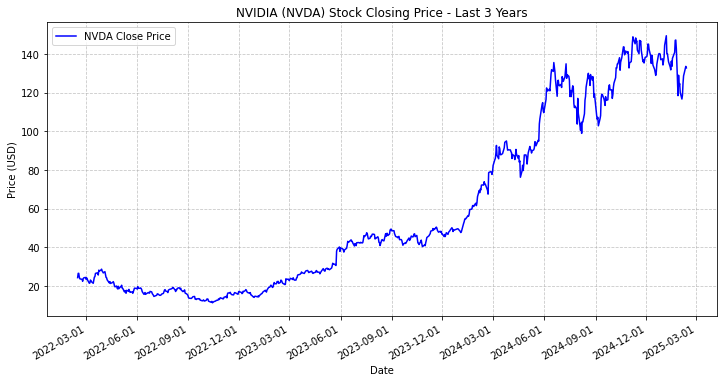

In [4]:
fig, ax = analyzer.plot_close_price()
fig


## Volume, in shares

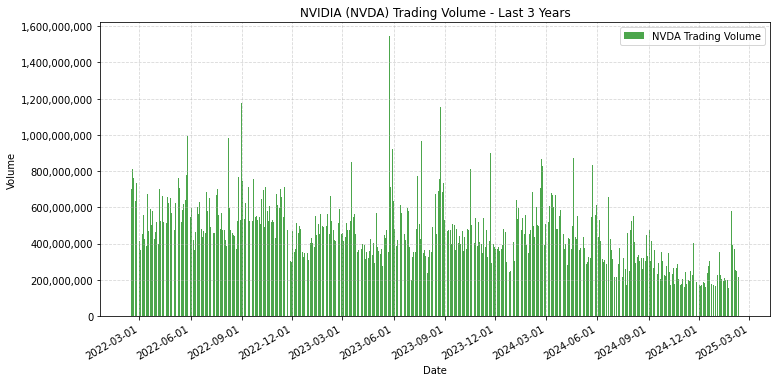

In [5]:
fig, ax = analyzer.plot_volume()
fig


## Volume (in dollars)

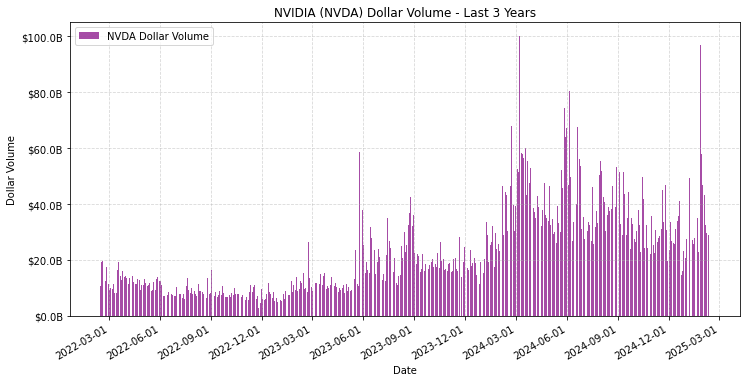

In [6]:
fig, ax = analyzer.plot_dollar_volume()
fig

## Volume (relative to total market volume)

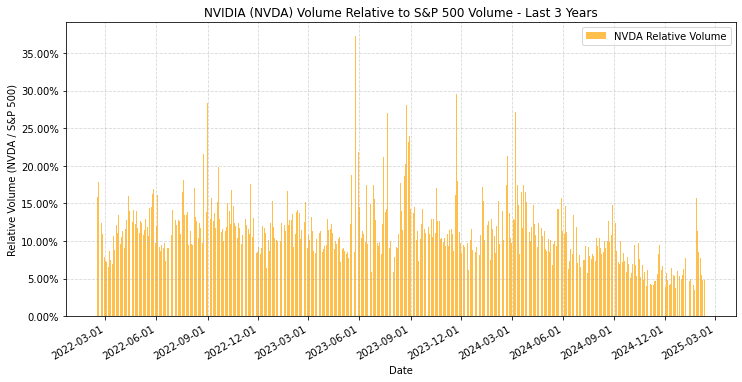

In [7]:
fig, ax = analyzer.plot_relative_volume()
fig

# Let's assume that the training data and test data are from the first/second half.

Are the distributions of training/test data similar ?

Note: we are assuming the second half if closer to the present, and therefore a more accurate proxy for unseen data that will be encountered in the near future.



## Price distributions

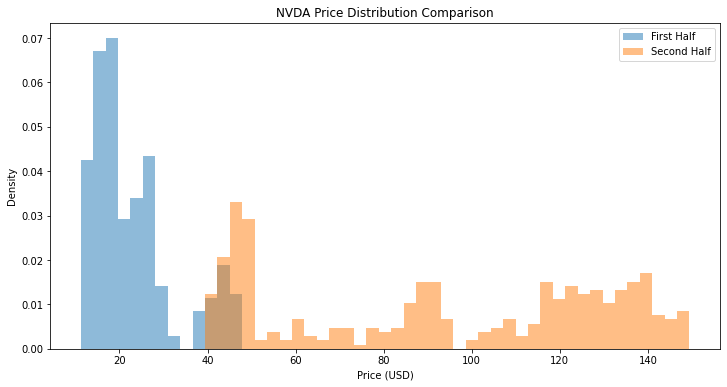

In [8]:
fig, ax = analyzer.plot_price_histogram()
fig

## Volume (shares) distributions

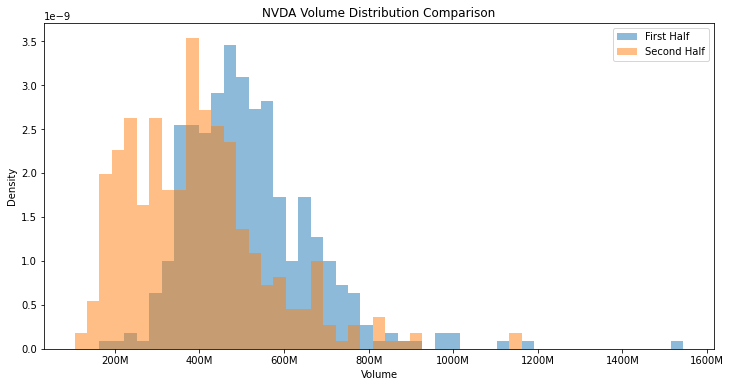

In [9]:
fig, ax = analyzer.plot_volume_histogram()
fig

## Volume (dollars) distributions

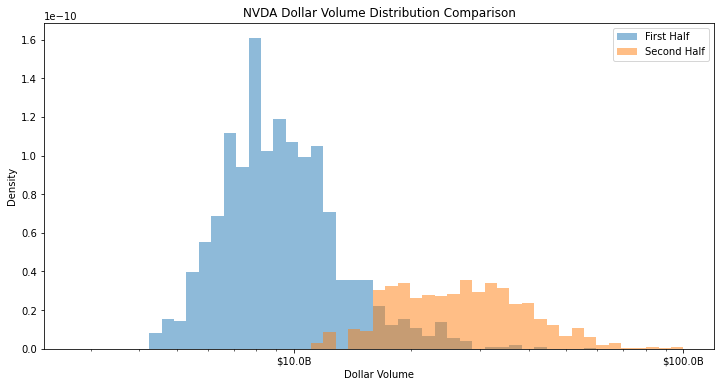

In [10]:
fig, ax = analyzer.plot_dollar_volume_histogram()
fig

## Volume (relative to market) distributions

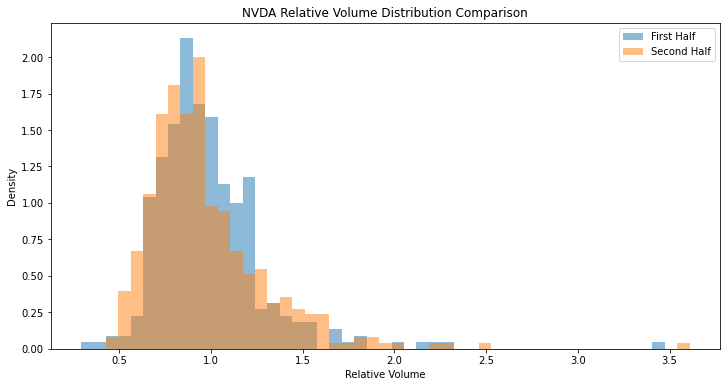

In [11]:
fig, ax = analyzer.plot_relative_volume_histogram()
fig

In [12]:
print("Done")

Done
